# BUSINESS PROBLEM-1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("LoansData.csv")

In [3]:
data


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [4]:
data.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [5]:
data.columns=[col.replace(".","_") for col in data.columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   object 
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [7]:
data.Interest_Rate = data.Interest_Rate.str.replace("%","")

In [8]:
data.Interest_Rate=data.Interest_Rate.astype('float64')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2499 non-null   float64
 1   Amount_Funded_By_Investors      2499 non-null   float64
 2   Interest_Rate                   2498 non-null   float64
 3   Loan_Length                     2500 non-null   object 
 4   Loan_Purpose                    2500 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2499 non-null   float64
 9   FICO_Range                      2498 non-null   object 
 10  Open_CREDIT_Lines               2497 non-null   float64
 11  Revolving_CREDIT_Balance        2497 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [10]:
data.isna().sum()

Amount_Requested                   1
Amount_Funded_By_Investors         1
Interest_Rate                      2
Loan_Length                        0
Loan_Purpose                       0
Debt_To_Income_Ratio               1
State                              0
Home_Ownership                     1
Monthly_Income                     1
FICO_Range                         2
Open_CREDIT_Lines                  3
Revolving_CREDIT_Balance           3
Inquiries_in_the_Last_6_Months     3
Employment_Length                 77
dtype: int64

In [11]:
data=data.dropna(axis=0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2413 non-null   float64
 1   Amount_Funded_By_Investors      2413 non-null   float64
 2   Interest_Rate                   2413 non-null   float64
 3   Loan_Length                     2413 non-null   object 
 4   Loan_Purpose                    2413 non-null   object 
 5   Debt_To_Income_Ratio            2413 non-null   object 
 6   State                           2413 non-null   object 
 7   Home_Ownership                  2413 non-null   object 
 8   Monthly_Income                  2413 non-null   float64
 9   FICO_Range                      2413 non-null   object 
 10  Open_CREDIT_Lines               2413 non-null   float64
 11  Revolving_CREDIT_Balance        2413 non-null   float64
 12  Inquiries_in_the_Last_6_Months  24

In [13]:
data = data.convert_dtypes()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2413 non-null   Int64  
 1   Amount_Funded_By_Investors      2413 non-null   Float64
 2   Interest_Rate                   2413 non-null   Float64
 3   Loan_Length                     2413 non-null   string 
 4   Loan_Purpose                    2413 non-null   string 
 5   Debt_To_Income_Ratio            2413 non-null   string 
 6   State                           2413 non-null   string 
 7   Home_Ownership                  2413 non-null   string 
 8   Monthly_Income                  2413 non-null   Float64
 9   FICO_Range                      2413 non-null   string 
 10  Open_CREDIT_Lines               2413 non-null   Int64  
 11  Revolving_CREDIT_Balance        2413 non-null   Int64  
 12  Inquiries_in_the_Last_6_Months  24

In [15]:
data.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Loan_Purpose                      0
Debt_To_Income_Ratio              0
State                             0
Home_Ownership                    0
Monthly_Income                    0
FICO_Range                        0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
dtype: int64

# a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [16]:
data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.9,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
1,19200,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
2,35000,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.0,690-694,14,21977,1,2 years
3,10000,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
4,12000,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.0,695-699,11,14469,0,9 years


In [17]:
#CI - 95%
#pvalue = 0.05
#Amount_Funded_By_Investors and Interest_Rate 
# numeric vs numeric
#Hence - Correlation test - use stat.pearsonr()
# Null Hypothesis H0: Interst rate and the loan amount are not related
# Altenative Hypothesis Ha : Interst rate and the loan amount are related

In [18]:
print(stats.pearsonr(data.Amount_Funded_By_Investors,data.Interest_Rate))


(0.3315955311036451, 5.064256950483673e-63)


In [19]:
5.064256950483673e-63 < 0.05

True

In [20]:
#Since P value is less, there is hight relation between interest rate and loan amount. 
#H0:Null hypothesis - Rejected

# b)Loan length is directly effecting intrest rate

In [21]:
data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.9,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
1,19200,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
2,35000,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.0,690-694,14,21977,1,2 years
3,10000,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
4,12000,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.0,695-699,11,14469,0,9 years


In [22]:
data.Loan_Length = data.Loan_Length.str.replace("months","").astype("float64")

In [23]:
data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.9,36.0,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
1,19200,19200.0,12.12,36.0,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
2,35000,35000.0,21.98,60.0,debt_consolidation,23.81%,CA,MORTGAGE,11500.0,690-694,14,21977,1,2 years
3,10000,9975.0,9.99,36.0,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
4,12000,12000.0,11.71,36.0,credit_card,18.78%,NJ,RENT,3195.0,695-699,11,14469,0,9 years


In [24]:
#CI - 95%
#pvalue = 0.05
#Loan_Length and Interest_Rate 
# numeric vs numeric
#Hence - Correlation test - use stat.pearsonr()
# Null Hypothesis H0: Interst rate and the Loan_Length are not related
# Altenative Hypothesis Ha : Interst rate and the Loan_Length are related

In [25]:
print(stats.pearsonr(data.Loan_Length,data.Interest_Rate))

(0.4250573823094765, 1.7938010673370282e-106)


In [26]:
1.7938010673370282e-106 < 0.05

True

In [27]:
#Since P value is less, there is hight relation between interest rate and loan length. 
#H0:Null hypothesis - Rejected
#Ha:Alternative hypothesis accepted

# c)Interest rate varies for different purpose of loans

In [28]:
data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.9,36.0,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
1,19200,19200.0,12.12,36.0,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
2,35000,35000.0,21.98,60.0,debt_consolidation,23.81%,CA,MORTGAGE,11500.0,690-694,14,21977,1,2 years
3,10000,9975.0,9.99,36.0,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
4,12000,12000.0,11.71,36.0,credit_card,18.78%,NJ,RENT,3195.0,695-699,11,14469,0,9 years


In [29]:
print(pd.unique(data["Loan_Purpose"]))

<StringArray>
['debt_consolidation',        'credit_card',              'other',
             'moving',                'car',           'vacation',
   'home_improvement',              'house',     'major_purchase',
        'educational',            'medical',            'wedding',
     'small_business',   'renewable_energy']
Length: 14, dtype: string


In [30]:
p1 = data.Interest_Rate[data.Loan_Purpose=="debt_consolidation"]
p2 = data.Interest_Rate[data.Loan_Purpose=="credit_card"]
p3 = data.Interest_Rate[data.Loan_Purpose=="other"]
p4 = data.Interest_Rate[data.Loan_Purpose=="moving"]
p5 = data.Interest_Rate[data.Loan_Purpose=="car"]
p6 = data.Interest_Rate[data.Loan_Purpose=="vacation"]
p7 = data.Interest_Rate[data.Loan_Purpose=="home_improvement"]
p8 = data.Interest_Rate[data.Loan_Purpose=="house"]
p9 = data.Interest_Rate[data.Loan_Purpose=="major_purchase"]
p10 = data.Interest_Rate[data.Loan_Purpose=="educational"]
p11 = data.Interest_Rate[data.Loan_Purpose=="medical"]
p12 = data.Interest_Rate[data.Loan_Purpose=="wedding"]
p13= data.Interest_Rate[data.Loan_Purpose=="small_business"]
p14= data.Interest_Rate[data.Loan_Purpose=="renewable_energy"]

In [31]:
stats.f_oneway(p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14)

F_onewayResult(statistic=7.330838185919651, pvalue=2.7646672581411367e-14)

In [32]:
2.7646672581411367e-14 <0.05

True

In [33]:
#H0: Interest rate doesnt varies for different purpose of loans
#Ha: Interest rate  varies for different purpose of loans

In [34]:
#Since p value is less than 0.05 with CI of 95%, reject H0 and accept Ha

In [35]:
print("p1 mean:",p1.mean(),"\np3 mean:",p2.mean(),"\np3 mean:",p3.mean(),"\np4 mean:",p4.mean(),"\np5 mean:",p5.mean(),
      "\np6 mean:",p6.mean(),"\np7 mean:",p7.mean(),"\np8 mean:",p8.mean(),"\np9 mean:",p9.mean(),"\np10 mean:",p10.mean(),
      "\np11 mean:",p11.mean(),"\np12 mean:",p12.mean(),"\np13 mean:",p13.mean(),"\np14 mean:",p14.mean())

p1 mean: 13.597773375594294 
p3 mean: 13.025558139534885 
p3 mean: 13.237037037037037 
p4 mean: 13.621034482758622 
p5 mean: 11.113000000000001 
p6 mean: 12.263000000000002 
p7 mean: 11.612040816326532 
p8 mean: 13.447999999999999 
p9 mean: 10.827000000000004 
p10 mean: 10.874285714285714 
p11 mean: 11.763214285714287 
p12 mean: 11.95891891891892 
p13 mean: 12.892409638554218 
p14 mean: 9.8775


# d)There is relationship between FICO scores and Home Ownership. It means that, people with owning home will have high FICO scores.


In [36]:
data.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000,20000.0,8.9,36.0,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
1,19200,19200.0,12.12,36.0,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
2,35000,35000.0,21.98,60.0,debt_consolidation,23.81%,CA,MORTGAGE,11500.0,690-694,14,21977,1,2 years
3,10000,9975.0,9.99,36.0,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
4,12000,12000.0,11.71,36.0,credit_card,18.78%,NJ,RENT,3195.0,695-699,11,14469,0,9 years


In [37]:
result = pd.crosstab(data.FICO_Range,data.Home_Ownership)

In [38]:
stats.chi2_contingency(result)

(269.7881202757335,
 3.087547281383599e-15,
 111,
 array([[2.29796933e+00, 1.03605470e-02, 3.91628678e-01, 2.30004144e+00],
        [1.37878160e+00, 6.21632822e-03, 2.34977207e-01, 1.38002487e+00],
        [4.59593867e-01, 2.07210941e-03, 7.83257356e-02, 4.60008288e-01],
        [1.83837547e+00, 8.28843763e-03, 3.13302942e-01, 1.84003315e+00],
        [5.42320763e+01, 2.44508910e-01, 9.24243680e+00, 5.42809780e+01],
        [6.34239536e+01, 2.85951098e-01, 1.08089515e+01, 6.34811438e+01],
        [7.67521757e+01, 3.46042271e-01, 1.30803978e+01, 7.68213842e+01],
        [7.39946125e+01, 3.33609615e-01, 1.26104434e+01, 7.40613344e+01],
        [7.21562370e+01, 3.25321177e-01, 1.22971405e+01, 7.22213013e+01],
        [5.88280149e+01, 2.65230004e-01, 1.00256942e+01, 5.88810609e+01],
        [6.20451720e+01, 2.79734770e-01, 1.05739743e+01, 6.21011189e+01],
        [6.71007045e+01, 3.02527973e-01, 1.14355574e+01, 6.71612101e+01],
        [5.69896395e+01, 2.56941567e-01, 9.71239121e+00, 5.704

In [39]:
3.087547281383599e-15<0.05

True

In [40]:
# hence p_value is less.
#if p_value is less, then there is a relationship between Fico Score and Home Ownership

# BUSINESS PROBLEM - 2

BACKGROUND: When an order is placed by a customer of a small manufacturing company, a 
price quote must be developed for that order. Because each order is unique, quotes must be 
established on an order-by-order basis by a pricing expert. The price quote process is laborintensive, as prices depend on many factors such as the part number, customer, geographic 
location, market, and order volume. The sales department manager is concerned that the pricing 
process is too complex, and that there might be too much variability in the quoted prices. An 
improvement team is tasked with studying and improving the pricing process.
After interviewing experts to develop a better understanding of the current process, the team 
designed a study to determine if there is variability between pricing experts. That is, do different 
pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and 
Barry, were asked to independently provide prices for twelve randomly selected orders. Each 
expert provided one price for each of the twelve orders.


BUSINESS PROBLEM: We would like to assess if there is any difference in the average 
price quotes provided by Mary and Barry.


In [41]:
df = pd.read_csv("Price_Quotes.csv")

In [42]:
df

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [43]:
df.shape

(12, 3)

In [44]:
stats.ttest_rel(df.Barry_Price,df.Mary_Price)

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

In [45]:
print("Barry Price Mean",df.Barry_Price.mean(),"\nMary Price Mean",df.Mary_Price.mean())

Barry Price Mean 124.33333333333333 
Mary Price Mean 114.75


# BUSINESS PROBLEM:3

In [46]:
data = pd.read_csv("Treatment_Facility.csv")
data

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [47]:
data = data.rename(columns = {"VAR4":"TRFF","VAR5":"CI"})

In [48]:
data

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [49]:
prior = data.CI[data.Reengineer=="Prior"]
post =  data.CI[data.Reengineer=="Post"]

In [50]:
prior.mean()

53.887906321846145

In [51]:
post.mean()

23.34971927988571

Null Hypothesis H0: prior_avg == post_avg
Alternative Hypothesis Ha:prior_avg <> post_avg
    
CI = 95%
MoE = 0.05

In [53]:
unequal_variance = stats.ttest_ind(prior,post,equal_var=False)
unequal_variance.statistic

2.209006531430452

In [54]:
equal_variance = stats.ttest_ind(prior,post,equal_var=True)
equal_variance.statistic

1.6279144253528646

In [55]:
unequal_variance.statistic - equal_variance.statistic

0.5810921060775875

# BUSINESS PROBLEM - 4

In [56]:
data = pd.read_csv("Priority_Assessment.csv")

In [57]:
data

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [58]:
high = data.Days[data.Priority=="High"]
med = data.Days[data.Priority=="Medium"]
low = data.Days[data.Priority=="Low"]

stats.f_oneway(high, med, low)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [59]:
print(high.mean())
print(med.mean())
print(low.mean())

3.0236196319018402
2.5
4.228358208955224


# BUSINESS PROBLEM - 5

In [60]:
film = pd.read_csv("Films.csv")

In [61]:
film

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [62]:
film.loc[film.Marital_Status == "1","Marital_Status"] ="Married"
film.loc[film.Marital_Status == "2","Marital_Status"] ="Single"

In [63]:
film

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


In [64]:
film.loc[film.Gender == "1","Gender"] ="Male"
film.loc[film.Gender == "2","Gender"] ="Female"

In [65]:
film

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,2.0,1.0,3


In [66]:
film.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [67]:
film=film.dropna(axis=0)

In [68]:
film.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    0
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

# 1. What isthe overall level of customer satisfaction?

In [69]:
film.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


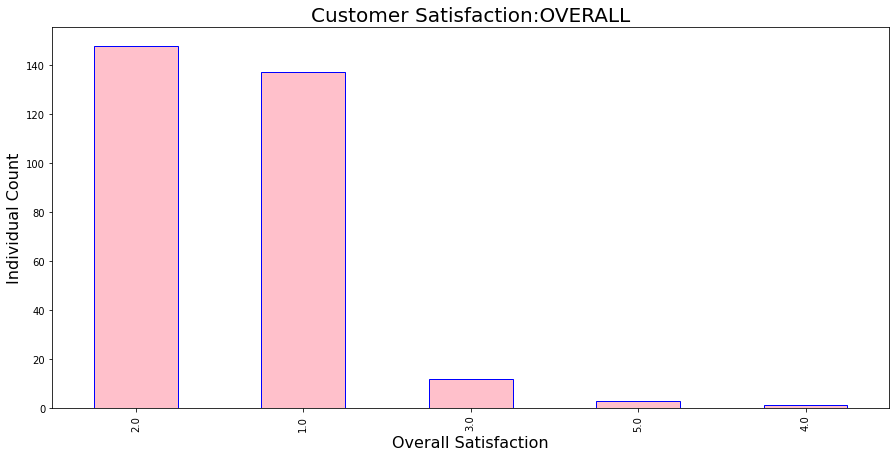

In [70]:
plt.figure(figsize=(15,7))
film["Overall"].value_counts().plot.bar(color="pink",edgecolor="blue")
plt.xlabel('Overall Satisfaction', fontsize=16)
plt.ylabel('Individual Count', fontsize=16)
plt.title('Customer Satisfaction:OVERALL',fontsize=20)
plt.show()

# 2.What factors are linked to satisfaction?

In [72]:
sinage =pd.crosstab(film.Sinage,film.Overall)
stats.chi2_contingency(sinage)


(121.32462033201084,
 3.054444776360607e-18,
 16,
 array([[4.77906977e+01, 5.16279070e+01, 4.18604651e+00, 3.48837209e-01,
         1.04651163e+00],
        [6.37209302e+01, 6.88372093e+01, 5.58139535e+00, 4.65116279e-01,
         1.39534884e+00],
        [2.04817276e+01, 2.21262458e+01, 1.79401993e+00, 1.49501661e-01,
         4.48504983e-01],
        [2.73089701e+00, 2.95016611e+00, 2.39202658e-01, 1.99335548e-02,
         5.98006645e-02],
        [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
         4.98338870e-02]]))

In [73]:
clean =pd.crosstab(film.Clean,film.Overall)
stats.chi2_contingency(clean)

(129.0342392337068,
 9.882317099745693e-20,
 16,
 array([[6.09900332e+01, 6.58870432e+01, 5.34219269e+00, 4.45182724e-01,
         1.33554817e+00],
        [6.28106312e+01, 6.78538206e+01, 5.50166113e+00, 4.58471761e-01,
         1.37541528e+00],
        [1.00132890e+01, 1.08172757e+01, 8.77076412e-01, 7.30897010e-02,
         2.19269103e-01],
        [2.27574751e+00, 2.45847176e+00, 1.99335548e-01, 1.66112957e-02,
         4.98338870e-02],
        [9.10299003e-01, 9.83388704e-01, 7.97342193e-02, 6.64451827e-03,
         1.99335548e-02]]))

In [74]:
park =pd.crosstab(film.Parking,film.Overall)
stats.chi2_contingency(park)

(218.79348282085004,
 1.2264032549812005e-37,
 16,
 array([[5.55282392e+01, 5.99867110e+01, 4.86378738e+00, 4.05315615e-01,
         1.21594684e+00],
        [6.32657807e+01, 6.83455150e+01, 5.54152824e+00, 4.61794020e-01,
         1.38538206e+00],
        [1.31993355e+01, 1.42591362e+01, 1.15614618e+00, 9.63455150e-02,
         2.89036545e-01],
        [3.18604651e+00, 3.44186047e+00, 2.79069767e-01, 2.32558140e-02,
         6.97674419e-02],
        [1.82059801e+00, 1.96677741e+00, 1.59468439e-01, 1.32890365e-02,
         3.98671096e-02]]))

# 3. What is the demographic profile of Film on the Rocks patrons?

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
film.loc[film.Age==1,'Age']='1-12'
film.loc[film.Age==2,'Age']='13-30'
film.loc[film.Age==3,'Age']='31-60'
film.loc[film.Age==4,'Age']='60+'

In [77]:
film.loc[film.Income==1,'Income']='<$50,000'
film.loc[film.Income==2,'Income']='$50-$100,000'
film.loc[film.Income==3,'Income']='$100,000+'

In [78]:
film

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,31-60,"<$50,000",5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,13-30,"<$50,000",5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,60+,"<$50,000",5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,60+,"<$50,000",5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,31-60,"$100,000+",1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,Female,Single,1.0,2.0,1.0,1.0,13-30,"<$50,000",1
326,0,Old School,Male,Married,2.0,2.0,2.0,2.0,31-60,"$100,000+",5
327,0,Old School,Female,Married,2.0,1.0,1.0,2.0,13-30,"$50-$100,000",5
328,0,Old School,Male,Married,1.0,1.0,1.0,1.0,13-30,"<$50,000",3


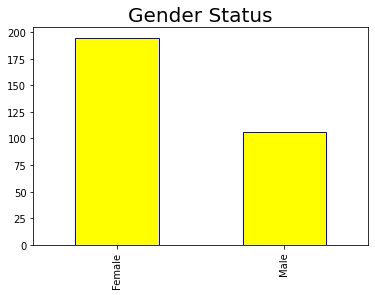

In [93]:
film["Gender"].value_counts().plot.bar(color="yellow",edgecolor="blue")
plt.title('Gender Status',fontsize=20)
plt.show()

In [80]:
film.Movie.unique()

array(['Ferris Buellers Day Off', 'Willy Wonka', 'Old School'],
      dtype=object)

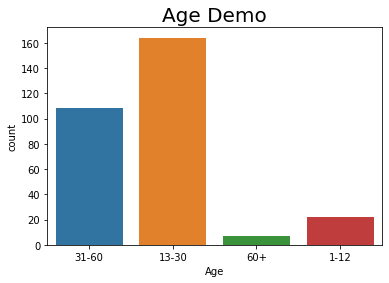

In [88]:
sns.countplot('Age', data=film);
plt.title('Age Demo',fontsize=20);

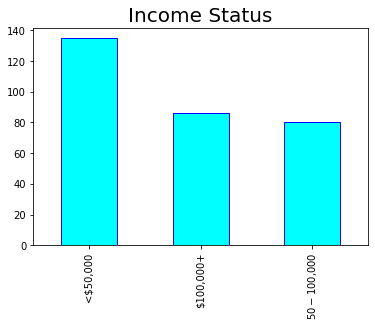

In [91]:
film["Income"].value_counts().plot.bar(color="cyan",edgecolor="blue")
plt.title('Income Status',fontsize=20)
plt.show()

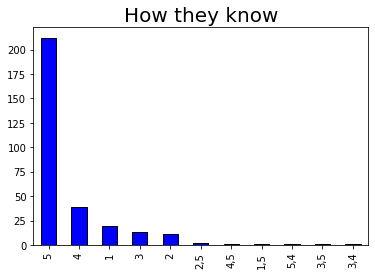

In [94]:
film["Hear_About"].value_counts().plot.bar(color="blue",edgecolor="black")
plt.title('How they know',fontsize=20)
plt.show()

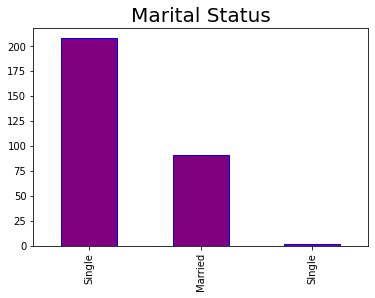

In [86]:
film["Marital_Status"].value_counts().plot.bar(color="purple",edgecolor="blue")
plt.title('Marital Status',fontsize=20)
plt.show()

In [ ]:
Summary:
     HIGH Customers who knows about Film on the Rocks patrons :
            Female is higher
            Age is 13-30
            Single is higher
            People came to know about is through word of mouth
            